<a href="https://colab.research.google.com/github/miamvmian/Scientific-Computation/blob/main/SciComp2024_HW2_sol_Lujiang_Qian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Scientific Computing 2024: Homework Assignment 2


### Problem 1 (2 points)
Let $A_q=\left(\begin{matrix}1 & q\\ 0 & 1\end{matrix}\right)$ with $q\in\mathbb R$.
* For any $q$, find condition number $\kappa(A_q)$ with respect to the $l^2$-norm.
* Give an example of specific values of $q,\mathbf b, \Delta\mathbf b$ such that, when solving $A_q\mathbf x = \mathbf b$ and $A_q(\mathbf x+\Delta \mathbf x)=\mathbf b +\Delta\mathbf b$, we get

$$\frac{\|\Delta \mathbf x\|}{\|\mathbf x\|}\ge 10^6\frac{\|\Delta\mathbf b\|}{\|\mathbf b\|}.$$

### Answer


* For matrix A_p, the condition number with respect to $l^2$-norm can be written:

 $$κ(A_q)= \frac{σ_{max}(A)}{σ_{min}(A)} =  \sqrt{\frac{|λ_{max}(A_q^* A_q)|}{|λ_{min}(A_q^* A_q)|}}$$

  $A_q^* A_q=\left(\begin{matrix}1 & 0\\ q & 1\end{matrix}\right)\left(\begin{matrix}1 & q\\ 0 & 1\end{matrix}\right)=\left(\begin{matrix}1 & q\\ q & 1+q^2\end{matrix}\right)$

  The eigen value of $A_q^* A_q$ is:

  $$λ_{max} = \frac{(q^2+2)+\sqrt{(q^2+2)^2-4}}{2}$$
  $$λ_{min} = \frac{(q^2+2)-\sqrt{(q^2+2)^2-4}}{2}$$


  $$κ(A_q)=1+\frac{1}{2}q \left(q+\sqrt{4+q^2} \right)$$


  
  * Let $\mathbf x = (x_1, x_2)$, $\mathbf b = (b_1, b_2)$, solving the equation analytically.

  $x_1 = b_1- q b_2$
  
  $x_2 = b_2$

  $$\frac{\|\Delta \mathbf x\|_2}{\|\mathbf x\|_2}=\sqrt{\frac{(\Delta b_1- q \Delta b_2)^2+\Delta b_2^2}{(b_1- q  b_2)^2+ b_2^2}}$$
  $$\frac{\|\Delta \mathbf b\|_2}{\|\mathbf b\|_2}=\sqrt{\frac{\Delta b_1^2+ \Delta b_2^2}{b_1^2+ b_2^2}}$$
  

  If $b_2=0$ and $\Delta b_1=0$, the above formula can be simplified,
$$\frac{\|\Delta \mathbf x\|_2}{\|\mathbf x\|_2}=\sqrt{\frac{(- q \Delta b_2)^2+\Delta b_2^2}{b_1^2}}$$
  $$\frac{\|\Delta \mathbf b\|_2}{\|\mathbf b\|_2}=\sqrt{\frac{ \Delta b_2^2}{b_1^2}}$$


  $$\frac{\|\Delta \mathbf x\|_2}{\|\mathbf x\|_2} \Biggm/ \frac{\|\Delta \mathbf b\|_2}{\|\mathbf b\|_2} = \sqrt{\frac{(q \Delta b_2)^2+\Delta b_2^2}{\Delta b_2^2}}\ge q$$

So under the following condition, the inequity can be satisfied.

* $q \ge 10^6$
* $\mathbf b = (b_1, 0)$, where $b_1 \neq 0$
* $\Delta \mathbf b = (0, \Delta b_2)$


### Problem 2 (2 points)
* Write a program to compute an approximate value for the derivative of a function using the finite-difference formula

  $$f'(x)\approx \frac{f(x+h)-f(x)}{h}.$$

  Test your program using the function $\tan(x)$ at $x=1$. Determine the error by comparing with the value obtained using the analytic derivative. Plot the magnitude of the error as a function of $h$, for $h=10^{-k}, k=0,\ldots,16$. You should use log scale for $h$ and for the magnitude of the error. What is the minimum value of the error and at which $h$ is it achieved? Explain this result theoretically.
* Repeat the exercise using the centered difference approximation

 $$f'(x)\approx \frac{f(x+h)-f(x-h)}{2h}.$$

 What is now different and why?


 ### Answer

 * The minimum value acheived as shown in the figure. It changes at different precision.
The error can be written in the following formula:

 $$\textrm {error} \left(h\right)= f''(x)h/2 +f'''(ξ)h^2/6$$

 where $x \lt ξ \lt x+h$. The error rises when the second term outforms to the first term.

* For the case of centered difference approximation, the error,

$$\textrm {error} \left(h\right)= f'''(ξ)h^2/3!+ f^{(5)}(ξ)h^4/5! $$ The slope of error-step is almost twice of that first case, it converges faster than the first case.





In [ ]:
! pip install mpmath

Analytical tan(2) -> 3.42551882081476
FED algorithm tan(2)-> 3.42551882081476
Set the precision: 16
Minimum error value achienve at h= 1e-09
Minimum error value: 7.765338094767316e-9


Set the precision: 20
Minimum error value achienve at h= 1e-11
Minimum error value: 2.8486346523756938924e-10


Set the precision: 24
Minimum error value achienve at h= 1e-12
Minimum error value: 9.74767708123437247910958e-13




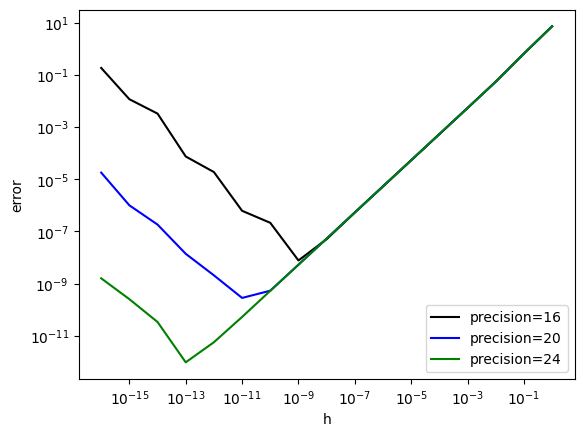

Analytical tan(2) -> 3.42551882081476
Center difference algorithm tan(2)-> 3.42551882081476
Set the precision: 16
Minimum error value achienve at h= 1e-06
Minimum error value: 6.223466186838778e-12


Set the precision: 20
Minimum error value achienve at h= 1e-07
Minimum error value: 7.8697143338643874011e-14


Set the precision: 24
Minimum error value achienve at h= 1e-08
Minimum error value: 3.28504564594869911183395e-17




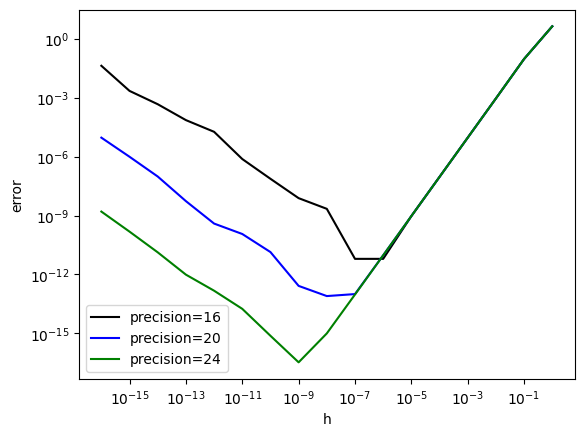

In [ ]:
from mpmath import mp
import numpy as np
import matplotlib.pyplot as plt


def FED_derivative(func, x, h):
    return (func(x + h) - func(x)) / h

mp.dps = 16
# test
x = mp.mpf(1)
h = mp.mpf(1e-5)
nd_func = FED_derivative(mp.tan, x, h)
d_func = mp.mpf(1)/mp.cos(x)**2
print(f"Analytical tan(2) -> {d_func}")
print(f"FED algorithm tan(2)-> {d_func}")

def precision(precision = 16):
  mp.dps = precision

  # error
  k = range(0, 17)
  h = [mp.mpf(10**(-ii)) for ii in k]
  nd_func_l = [FED_derivative(mp.tan, x, hi) for hi in h]

  # delta = [mp.fabs(ndi-d_func) for ndi in nd_func_l]
  delta = np.array([mp.fabs(ndi-d_func) for ndi in nd_func_l])
  k_min = int(-mp.log10(h[np.argmin(delta)]))

  print(f"=============================")
  print(f"Set the precision: {mp.dps}")
  print(f"Minimum error value achienve at h= {10**(-k_min)}")
  print(f"Minimum error value: {delta.min()}")
  print("\n")
  return h, delta

h_16, delta_16 = precision(precision = 16)
h_20, delta_20 = precision(precision = 20)
h_24, delta_24 = precision(precision = 24)



# plot
fig, ax = plt.subplots(1, 1)
ax.loglog(h_16, delta_16, 'k-', linewidth=1.5, label="precision=16")
ax.loglog(h_20, delta_20, 'b-', linewidth=1.5, label="precision=20")
ax.loglog(h_24, delta_24, 'g-', linewidth=1.5, label="precision=24")
ax.set_xlabel("h")
ax.set_ylabel("error")
plt.legend()
plt.show()




def Center_derivative(func, x, h):
    return (func(x + h) - func(x-h)) / (2*h)

mp.dps = 16
# test
x = mp.mpf(1)
h = mp.mpf(1e-5)
nd_func = Center_derivative(mp.tan, x, h)
d_func = mp.mpf(1)/mp.cos(x)**2
print(f"Analytical tan(2) -> {d_func}")
print(f"Center difference algorithm tan(2)-> {d_func}")

def Center_precision(precision = 16):
  mp.dps = precision

  # error
  k = range(0, 17)
  h = [mp.mpf(10**(-ii)) for ii in k]
  nd_func_l = [Center_derivative(mp.tan, x, hi) for hi in h]

  # delta = [mp.fabs(ndi-d_func) for ndi in nd_func_l]
  delta = np.array([mp.fabs(ndi-d_func) for ndi in nd_func_l])
  k_min = int(-mp.log10(h[np.argmin(delta)]))

  print(f"=============================")
  print(f"Set the precision: {mp.dps}")
  print(f"Minimum error value achienve at h= {10**(-k_min)}")
  print(f"Minimum error value: {delta.min()}")
  print("\n")
  return h, delta


ch_16, cdelta_16 = Center_precision(precision = 16)
ch_20, cdelta_20 = Center_precision(precision = 20)
ch_24, cdelta_24 = Center_precision(precision = 24)



# plot
fig, ax = plt.subplots(1, 1)
ax.loglog(ch_16, cdelta_16, 'k-', linewidth=1.5, label="precision=16")
ax.loglog(ch_20, cdelta_20, 'b-', linewidth=1.5, label="precision=20")
ax.loglog(ch_24, cdelta_24, 'g-', linewidth=1.5, label="precision=24")
ax.set_xlabel("h")
ax.set_ylabel("error")
plt.legend()
plt.show()


### Problem 3 (2 points)
* Implement regularized regression with an adaptive choice of regularization parameter. Your algorithm must accept the training data (`Xtrain`, `Ytrain`) and the input part of test data (`Xtest`), and output a prediction for test data (`Ypred`). You may use standard linear algebra libraries, but not specialized predictive modeling software (e.g., `scikit-learn`). Your algorithm should choose the regularization parameter by some optimization over a reasonable range of values and may use a sub-division of the training data into a train-in-train and a test-in-train components.
* Test your algorithm on real data from UCI repository:
  * https://archive.ics.uci.edu/ml/datasets/Relative+location+of+CT+slices+on+axial+axis
  * https://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure
  
  Use random subsets of 300 rows as training sets, and the remaining rows as the test sets. Use the relative RMS error as the measure of accuracy.
  Compare your results with results of some linear models implemented in standard predictive modeling software    (e.g., `Ridge` and `LinearRegression` from `scikit-learn`).

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split



def ridge_regression(X, Y, lda):
    """Closed-form solution for Ridge Regression"""
    n, d = X.shape
    I = np.eye(d)  # Identity matrix of size d
    beta = np.linalg.inv(X.T @ X + lda * I) @ X.T @ Y
    return beta


def getRRMSE(btest, bpred):
    return np.linalg.norm(bpred - btest) / np.linalg.norm(btest - np.mean(btest))

def random_choice_idx(Ntrain, N):
    inds = np.random.permutation(N)
    train_idx = inds[:Ntrain]
    test_idx = inds[Ntrain:]
    return train_idx, test_idx


def regularized_regression(Xtrain, Ytrain, Xtest, ldas):
    # 1. Split training data into a train-in-train set and test-in-train set, i.e. validation data set
    X_train_in_train, X_test_in_train, Y_train_in_train, Y_test_in_train = train_test_split(Xtrain, Ytrain,
                                                                                            test_size=0.2,
                                                                                            random_state=24)
    # 2. Perform cross-validation to find the best lambda
    best_lambda = None
    best_rrmse = float('inf')

    for lambda_reg in ldas:
        # Train the model on train_in_train with the current lambda
        beta = ridge_regression(X_train_in_train, Y_train_in_train, lambda_reg)
        Y_pred_in_train = X_test_in_train @ beta
        rrmse = getRRMSE(Y_test_in_train, Y_pred_in_train)

        # Update the best lambda if this one performs better
        if rrmse < best_rrmse:
            best_rrmse = rrmse
            best_lambda = lambda_reg

    print(f"Best lambda found: {best_lambda} with RRMSE: {best_rrmse}")

    beta_final = ridge_regression(Xtrain, Ytrain, best_lambda)

    return beta_final


if __name__ == "__main__":
    df = pd.read_csv(filepath_or_buffer="CASP.csv",
                     on_bad_lines='skip', index_col=0)

    print('Total rows:', df.shape[0])
    print('Total columns:', df.shape[1])

    N = len(df)
    A = df.values  # input values
    y = df.index.values  #

    Ntrain = 300

    train, test = random_choice_idx(Ntrain, N)
    Xtrain = A[train]
    Ytrain = y[train]
    Xtest = A[test]
    Ytest = y[test]

    # Define a range of lambda values to try
    ldas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

    # Call the function
    coeffs = regularized_regression(Xtrain, Ytrain, Xtest, ldas)
    Ypred = Xtest.dot(coeffs)
    # Output the predictions
    # print("Predictions on test data:", Ypred)
    print(f"RRMSE in Predictions: {getRRMSE(Ytest, Ypred)}")


    from sklearn.linear_model import Ridge
    from sklearn.linear_model import LinearRegression as LR

    model = Ridge()
    model.fit(Xtrain, Ytrain)
    bpred_ridge = model.predict(Xtest)
    print ('RRMS error for Ridge model:', getRRMSE(Ytest, bpred_ridge))

    model = LR()
    model.fit(Xtrain, Ytrain)
    bpred_lr = model.predict(Xtest)
    print ('RRMS error for LR model:', getRRMSE(Ytest, bpred_lr))

Total rows: 45730
Total columns: 9
Best lambda found: 100 with RRMSE: 0.8185316764302591
RRMSE in Predictions: 0.8652142390575304
RRMS error for Ridge model: 0.8654141710419696
RRMS error for LR model: 0.8638336928383237


### Problem 4 (2 points)
Suppose that we use the Leapfrog algorithm with some $\Delta t$ to simulate the dynamics of the harmonic oscillator (https://en.wikipedia.org/wiki/Harmonic_oscillator) with positive mass $m$ and force constant $k$ (in other words, with the energy function $H=\frac{m\dot x^2}{2}+\frac{kx^2}{2}$). Assuming a perfect implementation of Leapfrog, at which combinations of $\Delta t, m, k$ will the simulation diverge as $n\to\infty$, in the sense that $\sup_n(\tilde x_n^2+\tilde v_{n+1/2}^2)=\infty$?

## Answer
According to Hamiltonian mechanics formulism, let $p =mv$, the following differential equations,

$$ \dot x =  v $$
$$ m\dot v = -kx$$

With Leapfrog algorithm,


$$\left\{\begin{align}
\tilde x_{n+1} &= \tilde x_{n}+\tilde v_{n+1/2}\Delta t,\\
\tilde v_{n+1/2} &= \tilde v_{n-1/2}-\frac{k}{m}\tilde x_{n}\Delta t.
\end{align}\right. $$
$$\left\{\begin{align}
\tilde x_{0} &= x_{0},\\
\tilde v_{1/2} &= v_0-\frac{k}{2m}\tilde x_{0}\Delta t.
\end{align}\right.$$


Thus, let $\omega_{0}^2=\frac{k}{m}$, further writing the Leapfrog algroithm into matrixform:


$$
\mathbf X_{n+1}= M \mathbf X_n
$$
$$
\mathbf X_{n+1}= M \mathbf X_n =  M^n \mathbf X_1
$$


$$
M_n = M^n
$$, where

$$
M = \begin{pmatrix}
1  & \Delta t \\
-\omega_0^2 & 1 -  \omega_0^2 \Delta t
\end{pmatrix}
$$
$$
\mathbf X_{n}=  \begin{pmatrix}
\tilde x_n  \\
\tilde v_{n+1/2}  
\end{pmatrix}
$$

Finding the eigen values of matrix M,

$$
1-λ = \frac{1}{2}\left( \omega_0^2 \Delta t \pm \sqrt{\omega_0^2 \Delta t} \sqrt{\omega_0^2 \Delta t -4 } \right)
$$

Only if the following condition satisfied
$$
\omega_0^2 \Delta t -4 \le 0
$$ or

$$
\Delta t \le 2\sqrt{\frac{m}{k}}
$$

thus, $ \|\mathbf X_{n+1}\|_2= \|M_n \mathbf X_n \|_2$ $\le \|M_n \|_2 \|X_1 \|_2 < ∞ $

### Problem 5 (2 points)
Suppose that we are solving the ODE $\frac{d}{dt}\mathbf {x}=f(\mathbf x)$ (with, generally, a vector-valued $\mathbf x(t)$) by iterations

$$\left\{\begin{align}\mathbf k &= f(\tilde{\mathbf x}_{n})\Delta t\\
\tilde {\mathbf x}_{n+1} &= \tilde {\mathbf x}_{n}+f(\tilde{\mathbf x}_{n}+\tfrac{1}{2}\mathbf k)\Delta t
\end{align}\right.$$

Find the global convergence order of this method, and verify it experimentally.

## Answer

Considering a time step $Δt$, directly Taloyer expansion the solution and plugging the differenial equation,

$$ \begin{align}
\mathbf x(t+\Delta t) &= \mathbf x(t) + \mathbf x'(t) \Delta t + \frac{1}{2}\mathbf x''(t) \Delta t^2 + O[\Delta t^3] \\
&= \mathbf x(t)+f(\mathbf x(t)) \Delta t+ \frac{1}{2}\frac{\partial f}{\partial \mathbf x} \mathbf x'(t) \Delta t^2 + O[\Delta t^3] \\
&=\mathbf x(t)+f(\mathbf x(t)) \Delta t+ \frac{1}{2}\frac{\partial f}{\partial \mathbf x} f(\mathbf x) \Delta t^2 + O[\Delta t^3]
\end{align}$$

Using the Taloyer expansion for $\mathbf k$,

$$f(\tilde{\mathbf x}_{n}+\tfrac{1}{2}\mathbf k) = f(\tilde{\mathbf x}_{n}) + \frac{1}{2} \mathbf k \frac{\partial f}{\partial \mathbf x} + O[\mathbf k^2]
$$

Plug $\mathbf k$ into above equation,

$$ \begin{align}
\mathbf{\tilde {x}}_{n+1} &= \mathbf{\tilde {x}}_{n} + \frac{1}{2} \mathbf k \frac{\partial f}{\partial \mathbf x} f(\mathbf{\tilde {x}}_{n}) \Delta t + \Delta t O[\Delta \mathbf k^2] \\
&= \mathbf{\tilde {x}}_{n} + f(\mathbf{\tilde {x}}_{n}) \Delta t+ \frac{1}{2}  \frac{\partial f}{\partial \mathbf x} f(\mathbf{\tilde {x}}_{n}) \Delta t^2 + O[\Delta t^3]
\end{align}$$

So the local truncate error, or local converage order is $O[\Delta t^3]$, thus the global converage order is $O[\Delta t^2]$.

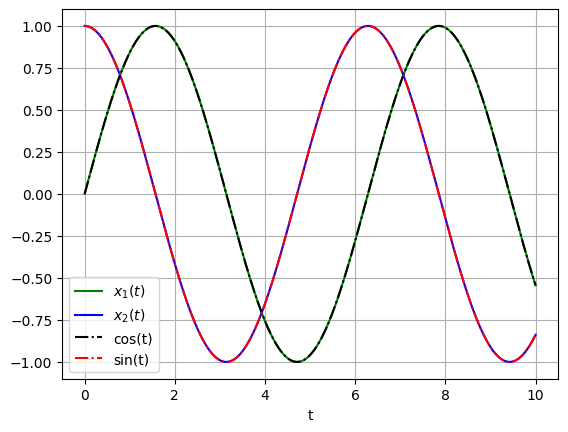

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the vector-valued function f(x)
def f(x, a, b):
  x1, x2 = x
  dx1 = -a * x1 + b * x2
  dx2 = -b * x1 - a * x2
  return np.array([dx1, dx2])


def numerical_method(x0, f, t_final, delta_t, a, b):
  N = int(t_final / delta_t)  # Number of time steps
  t = np.linspace(0, t_final, N + 1)  # Time array
  x = np.zeros((N + 1, len(x0)))  # Array to store solution (x1 and x2)
  x[0] = x0  # Initial condition

  for n in range(N):
    # Calulate intermediate step k
    k = f(x[n], a, b)*delta_t
    x_temp = x[n] + 1.0/2*k
    x[n+1] = x[n] + f(x_temp, a, b)*delta_t

  return t, x

# Parameters for the system
a = 0.0
b = 1.0
x0 = np.array([0.0, 1.0])  # Initial condition: x1(0) = 1, x2(0) = 0
t_final = 10.0
delta_t = 0.001  # Time step size

t, x = numerical_method(x0, f, t_final, delta_t, a, b)

# Exact solution
x1_exact = np.sin(t)
x2_exact = np.cos(t)


# Plot the solutions
plt.plot(t, x[:, 0], "g-", label='$x_1(t)$')
plt.plot(t, x[:, 1], "b-", label='$x_2(t)$')
plt.plot(t,x1_exact,"k-.", label="cos(t)")
plt.plot(t,x2_exact, 'r-.',label="sin(t)")
plt.xlabel('t')

plt.legend()
plt.grid(True)
plt.show()


delta_t_l = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]  # Time step size list

errors = []

def getRMSE(exact, numerical):
    return np.linalg.norm(exact - numerical)


for delta_t in delta_t_l:
  t, x = numerical_method(x0, f, t_final, delta_t, a, b)

  # Exact solution
  exact_x1 = np.sin(t)
  exact_x2 = np.cos(t)

  error_x1 = getRMSE(x[:,0], exact_x1)
  error_x2 = getRMSE(x[:,1], exact_x2)
  errors.append(error_x1)
  # errors.append((error_x1+error_x2)/2.0)




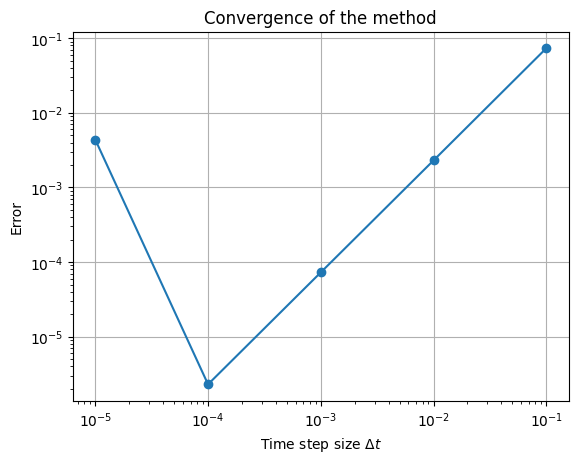

In [ ]:
# Plotting the convergence
plt.loglog(delta_t_l, errors, marker='o')
plt.xlabel('Time step size $\Delta t$')
plt.ylabel('Error')
plt.title('Convergence of the method')
plt.grid(True)
plt.show()
